# Cell count

Get an overview of the number of cells recorded per mouse, per session, etc. 

There is no criterion for the inclusion of neurons. This is just to give us an idea of how many clusters were kept after manual clustering.

In [1]:
%load_ext autoreload
%autoreload 2
%run ../setup_project.py
import os.path
import shutil

In [2]:
projectName, dataPath, dlcModelPath, myProject, sSessions = setup_project_session_lists(projectName="autopi_mec",dataPath="/adata/projects/autopi_mec",dlcModelPath="/adata/models")

creating myProject, an autopipy.project object
Project name: autopi_mec
dataPath: /adata/projects/autopi_mec
dlcModelPath: /adata/models
Reading /adata/projects/autopi_mec/sessionList
We have 180 testing sessions in the list
spikeA.Kilosort_session objects are in sSessions


Get the number of clusters per session.

In [4]:
from spikeA.Spike_train_loader import Spike_train_loader
cluNumber = []
for ses in tqdm(sSessions):
    stl = Spike_train_loader()
    stl.load_session_spike_trains(ses)
    cluNumber.append(len(stl.clu_ids))

  0%|          | 0/180 [00:00<?, ?it/s]

100%|██████████| 180/180 [02:32<00:00,  1.18it/s]


Create a DataFrame

In [5]:
df = pd.DataFrame({"session": [ses.name for ses in sSessions],
              "mouse": [ses.subject for ses in sSessions],
              "nClusters":cluNumber})

In [6]:
print("Number of neurons in the dataset: {}".format(np.sum(df.nClusters)))


Number of neurons in the dataset: 10850


In [7]:
np.sort(df.mouse.unique())

array(['jp1084', 'jp1684', 'jp1685', 'jp1686', 'jp1687', 'jp3120',
       'jp3129', 'jp3130', 'jp3269', 'jp451', 'jp452', 'jp486', 'jp487',
       'jp497', 'jp499', 'mn8578', 'mn8599'], dtype=object)

In [10]:
def plotNeuronsPerSession(ax,df):
    """
    Boxplot with the number of recorded neurons per session for each mouse
    """
    sns.boxplot(data=df, x="mouse", y="nClusters", order = np.sort(df.mouse.unique()))

    ax.tick_params(axis='x', rotation=90)
    #ax.set_ylim(0,150)
    ax.set_ylabel("Neurons per\n session")
    #ax.yaxis.set_label_coords(-0.25, 0.5)
    ax.set_xlabel("Mouse")

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)  
    # for tick in ax.xaxis.get_major_ticks():
    #     tick.label.set_fontsize(8) 

def plotNeuronsPerMouse(ax,df):
    dfSum = df.groupby('mouse').agg('sum')
    ax.bar(dfSum.index, dfSum.nClusters,color=sns.color_palette(), edgecolor = "black")
    ax.set_ylabel("Neurons per\n mouse")
    #ax.yaxis.set_label_coords(-0.25, 0.5)
    ax.set_xlabel("Mouse")
    #ax.set_ylim(0,750)

    ax.tick_params(axis='x', rotation=90)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)  
    # for tick in ax.xaxis.get_major_ticks():
    #     tick.label.set_fontsize(8) 

def plotSessionsPerMouse(ax,df): 
    dfC = df.groupby('mouse').size().reset_index(name='counts')
    dfC
    ax.bar(dfC.mouse, dfC.counts,color=sns.color_palette(), edgecolor = "black")
    ax.set_ylabel("Sessions per\n mouse")
    #ax.yaxis.set_label_coords(-0.25, 0.5)
    ax.set_xlabel("Mouse")
    ax.set_ylim(0,20)

    ax.tick_params(axis='x', rotation=90)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)  
    # for tick in ax.xaxis.get_major_ticks():
    #     tick.label.set_fontsize(8) 

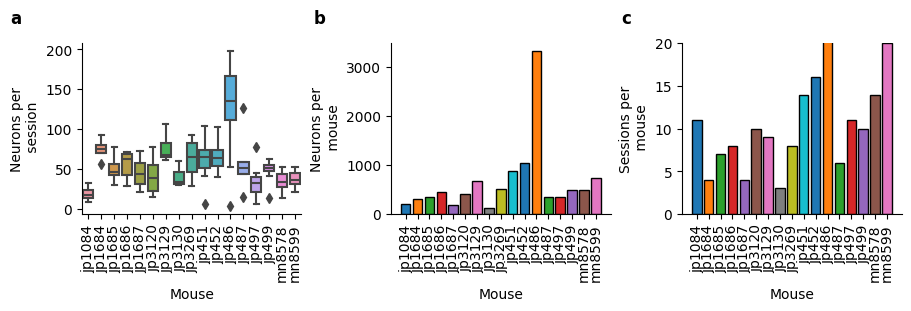

In [13]:
rowSize,colSize= 3, 3 #figurePanelDefaultSize()
nPlots=3
fig = plt.figure(figsize=(nPlots*colSize, 1*rowSize), constrained_layout=True) # create a figure
spec = fig.add_gridspec(ncols=nPlots, nrows=2,height_ratios=[0.15,0.9]) # create a GridSpec object to a figure
specLetters = fig.add_gridspec(ncols=1, nrows=1) # create a GridSpec object to a figure

ax = fig.add_subplot(spec[1,0]) # add an axes to the figure
plotNeuronsPerSession(ax,df)

ax = fig.add_subplot(spec[1,1]) # add an axes to the figure
plotNeuronsPerMouse(ax,df)

ax = fig.add_subplot(spec[1,2]) # add an axes to the figure
plotSessionsPerMouse(ax,df)

ax = fig.add_subplot(specLetters[0]) # add an axes to the figure
ax.text(0.0,1.0, 'a', style='normal',fontsize=12, weight="bold")
ax.text(0.34,1.0, 'b', style='normal',fontsize=12, weight="bold")
ax.text(0.685,1.0, 'c', style='normal',fontsize=12, weight="bold")
ax.axis("off")


plt.show()